In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab.ipynb")

# Lab 5 – Missing Values and Imputation

## DSC 80, Spring 2024

### Due Date: Wednesday, May 8th at 11:59 PM

## Instructions
Welcome to the fifth lab assignment in DSC 80 this quarter!

Much like in DSC 10, this Jupyter Notebook contains the statements of the problems and provides code and Markdown cells to display your answers to the problems. Unlike DSC 10, the notebook is *only* for displaying a readable version of your final answers. The coding will be done in an accompanying `lab.py` file that is imported into the current notebook, and **you will only submit that `lab.py` file**, not this notebook!

<div class="alert alert-block alert-danger">
<b>Note: For Lab 5 only, there are no hidden tests!</b> The tests you see when you run <code>grader.check</code> are the final tests that will determine your grade. In addition, when you submit Lab 5 to Gradescope you will see your final score on the assignment right away. (This is because the lab is due very close to the Midterm Exam.)
</div>

Some additional guidelines:
- **Do not change the function names in the `lab.py` file!** The functions in the `lab.py` file are how your assignment is graded, and they are graded by their name. If you changed something you weren't supposed to, you can find the original code in the [course GitHub repository](https://github.com/dsc-courses/dsc80-2024-sp).
- Notebooks are nice for testing and experimenting with different implementations before designing your function in your `lab.py` file. You can write code here, but make sure that all of your real work is in the `lab.py` file, since that's all you're submitting.
- **To ensure that all of your work to be submitted is in `lab.py`, we've provided an additional uneditable notebook, called `lab-validation.ipynb`, that contains only the tests and their setup. Make sure you are able to run it top-to-bottom without error before submitting!**
- You are encouraged to write your own additional helper functions to solve the lab, as long as they also end up in `lab.py`.

**Importing code from `lab.py`**:

* Below, we import the `.py` file that's contained in the same directory as this notebook.
* We use the `autoreload` notebook extension to make changes to our `lab.py` file immediately available in our notebook. Without this extension, we would need to restart the notebook kernel to see any changes to `lab.py` in the notebook.
    - `autoreload` is necessary because, upon import, `lab.py` is compiled to bytecode (in the directory `__pycache__`). Subsequent imports of `lab` merely import the existing compiled python.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from lab import *

In [85]:
from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ks_2samp

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
pd.options.plotting.backend = 'plotly'

# DSC 80 preferred styles
pio.templates["dsc80"] = go.layout.Template(
    layout=dict(
        margin=dict(l=30, r=30, t=30, b=30),
        autosize=True,
        width=600,
        height=400,
        xaxis=dict(showgrid=True),
        yaxis=dict(showgrid=True),
        title=dict(x=0.5, xanchor="center"),
    )
)
pio.templates.default = "simple_white+dsc80"

def create_kde_plotly(df, group_col, group1, group2, vals_col, title=''):
    fig = ff.create_distplot(
        hist_data=[df.loc[df[group_col] == group1, vals_col], df.loc[df[group_col] == group2, vals_col]],
        group_labels=[group1, group2],
        show_rug=False, show_hist=False
    )
    return fig.update_layout(title=title)

import requests
import bs4 

## Part 1: Missingness Mechanisms

First, let's recap the different mechanisms of missingness we studied in lecture.

### Missing by Design (MD)
- The missing field is deliberately missing. The missing field is deliberately set to null or not collected (hence, "missing by design").
- The missingness can be exactly predicted when a column will be null, with only knowledge of the other columns using a function of the rows of the dataset.

### Missing Completely at Random (MCAR)
- The missingness of missing value isn't related to the actual, unreported value itself, nor the values in any other fields. The missingness is not systematic.
- The missingness is unconditionally uniform across rows. MCAR doesn't bias the observed data.
- There is no relationship between the missing data and the any of the other data, observed or missing.

### Missing at Random (MAR)
- The missingness of the missing value has nothing to do with the value itself, but may be related to another field.
- The missingness is uniform across rows, perhaps conditional on another column. MAR biases the observed data, but is fixable.
- There is a systematic relationship between the missing values and the observed data (but not the missing values themselves).
- Difference between MD and MAR: If you can *exactly/always* determine missingness using the other columns, the missingness is MD. If there is just some sort of systematic relationship between the missing columns/values and other columns/values that may help us predict missingness, the missingness is MAR.

### Not Missing At Random (NMAR)
- The missingness of the missing value is related to the actual, unreported value.
- NMAR biases the observed data in unobservable ways.
- There is relationship between the propensity of a value to be missing and its value.

### Question 1 – After-Purchase Surveys 🛒

You run a small e-commerce website and send surveys out to customers after they purchase an item from your store. The survey asks whether the customer is satisfied with their purchase ("Yes" or "No"). Below, you are presented with possible datasets, each of which contains a column `'satisfied'` as described above, as well as a `'customer_id'` number corresponding to the customer and an `'item'` column describing the item that the customer purchased. **The column `'satisfied'` is missing data.**

For each of the following datasets, label the column `'satisfied'` as being `'MD'`, `'MCAR'`, `'MAR'`, or `'NMAR'`.

1. The dataset consists only of the columns `'customer_id'` and `'satisfied'`.
2. The dataset contains the `'customer_id'` of every customer with an account, even if they didn't make a purchase. Also, in this case, you notice everyone who was sent a survey filled it out.
3. The dataset contains a column specifying if the user later returned the item.
4. The dataset contains a column with the serial number for the item purchased.
5. The dataset contains a column with the price of the item purchased.

Complete the implementation of the function `after_purchase`, which records your answers and returns a list of length 5, containing the values `'MD'`, `'MCAR'`, `'MAR'`, or `'NMAR'`. For some questions there may be multiple good answers, but there is generally one answer that is "best". If you are unsure, ask a tutor, but be prepared to provide justification for whichever answer(s) you think might be right.

***Disclaimer***: We know that this lab has no hidden tests, and so it is possible to just look at the correct answers by running `grader.check`. This is not a good idea – you should really think about all of the questions here, since similar questions will be on the Midterm Exam.

In [86]:
def after_purchase():
    return ['NMAR', 'MD', 'MAR', 'MAR', 'MAR']

In [87]:
# don't change this cell -- it is needed for the tests to work
out_q1 = after_purchase()

In [88]:
grader.check("q1")

q1 results: All test cases passed!

### Question 2 – Miscellaneous Missingness Questions 🕵️

In each of the following scenarios, choose the best answer out of the missingness types: `'MD'`, `'MCAR'`, `'MAR'`, and `'NMAR'`. Store your answers in a list of length 5, and complete the implementation of the function `multiple_choice`, which returns that list.

1. UCSD has recently adopted GrubHub as the food pre-ordering app for campus restaurants, so you can order your food ahead of time and stop by before your next class. In a DataFrame of GrubHub app orders, which contains information such as `'restaurant'`, `'name'`, `'items'`, and `'total'`, the column `'delivery_address'` is often missing for UCSD students. Which is the most likely missingness mechanism for this column?


2. In a database of student records that records student profile data, such as `'first_name'`, `'home_address'`, `'ethnicity'`, etc., sometimes the `'middle_name'` column is missing. Which is the most likely missingness mechanism for this column?


3. The UCSD Club Basketball team creates a signup sheet for potential new members. The sheet contains the columns `'full_name'`, `'year'`, `'email'`, `'favorite_sports'`, `'number_of_sports_played'`, and `'sports_previously_played'`. The team president notices that many students left the `'sports_previously_played'` column blank. Which is the most likely missingness mechanism for this column?


4. After the 2023 Sun God Festival, Associated Students sends out a survey to all students about whether their expectations for the 2022 Sun God Festival were met, with all questions being optional. They notice that many students left the "Were you satisfied with the 2023 Sun God Festival?" question blank. Which is the most likely missingness mechanism for answers to this question?


5. UCSD has been using a two-factor authentication system, DUO, since October 16th, 2019. When using DUO, all UCSD accounts are assigned a unique code. UCSD's Service Desk, who maintains DUO, has a database that stores each user's code and their phone number, which users must provide when they sign up for DUO. They notice that many phone numbers are missing. Which is the most likely missingness mechanism for phone numbers?

In [89]:
def multiple_choice():
    return ['MAR', 'MAR', 'MD', 'NMAR', 'MCAR']

In [90]:
# don't change this cell -- it is needed for the tests to work
out_q2 = multiple_choice()

In [91]:
grader.check("q2")

q2 results: All test cases passed!

## Part 2: Assessing Missingness Through Data

Great, we're familiar with the various ways in which data can be missing. Let's now focus on deciding whether data in a particular column look MCAR or MAR through permutation tests.

### Question 3 – Payment Data 💰

In `data/payment.csv`, you are given a dataset of payment information for purchases made on January 1st, 2019. The dataset contains the customers' `'id'`, `'credit_card_type'`, `'credit_card_number'`, and `'date_of_birth'`.

You'd like to assess whether the missingness of `'credit_card_number'` is dependent on the age of the customer. Here's how you'll proceed:

<br>

#### `first_round`

Look at distribution of ages by missingness of `'credit_card_number'` and determine if the missingness is dependent on age or not.

Use the following steps to approach this problem:

- Compute the ages of the customers. To find a customer's age, compute the number of years between their birth year and 2024.
- Draw the distribution of ages by missingness of `'credit_card_number'`. Specifically, you will draw two histograms or density curves:
    - One of ages where `'credit_card_number'` is missing.
    - One of ages where `'credit_card_number'` is not missing.
    You can use the `create_kde_plotly` helper function imported at the top of the notebook to help you, if you'd like.
- Perform a permutation test for whether or not the two distributions mentioned above are drawn from the same population distribution. Use a 5% significance level. Use the **absolute difference of means** as your test statistic.

Note that some of the ages themselves are also missing; you don't need to do anything about this.

Complete the implementation of the function `first_round`, which takes in no arguments that returns a **list** with two values:
* The first value is the p-value from your permutation test. 
* The second value is either `'R'` if you reject the null hypothesis, or `'NR'` if you fail to reject the null.

**Does the result match your guess? If not, what might be a problem?**

<br>

#### `second_round`

Repeat the same permutation test as in `first_round`, but this time, use the **Kolmogorov-Smirnov statistic** as your test statistic.

Complete the implementation of the function `second_round` with no arguments that returns a __list__ with three values: 
* The first value is the p-value from your new permutation test.
* The second value is either `'R'` if you reject the null hypothesis, or `'NR'` if you fail to reject the null. 
* The third value is your final conclusion: `'D'` (the missingness of `'credit_card_number'` is dependent on age) or `'ND'` (the missingness of `'credit_card_number'` is not dependent on age).

Note that in [Lecture 8](https://dsc80.com/resources/lectures/lec08/lec08.html), we ran permutation tests using the Kolmogorov-Smirnov test statistic **without `for`-loops**. You can use this same procedure; we have already imported `stats` from `scipy`.

In [125]:
# Run your permutation tests in the Jupyter Notebook
# and put your final results in lab.py.
payments_fp = Path('data') / 'payment.csv'
payments = pd.read_csv(payments_fp)
payments.head()

,id,credit_card_type,credit_card_number,date_of_birth
0,1,diners-club-enroute,2.018706e+14,25-Sep-1982
1,2,americanexpress,3.737511e+14,08-Jan-1946
2,3,jcb,3.570296e+15,NaN
3,4,mastercard,5.318327e+15,NaN
4,5,maestro,6.759827e+17,20-Apr-1975


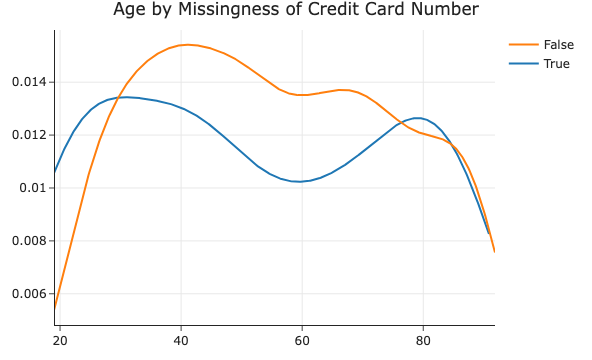

In [126]:
df = payments.copy()
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], format='%d-%b-%Y')
df['age'] = 2024 - df['date_of_birth'].dt.year
df['credit_card_number_missing'] = df['credit_card_number'].isna()
df = df.loc[df['age'].isna() == False] # drop missing age values
create_kde_plotly(df, 'credit_card_number_missing', True, False, 'age', "Age by Missingness of Credit Card Number")

In [127]:
group_means = (
    df
    .groupby('credit_card_number_missing')
    .mean()
    .loc[:, 'age']
    )
observed_diff = np.abs(group_means.loc[True] - group_means.loc[False])
observed_diff

2.940722967870805

In [128]:
sim_diffs = []

for i in range(1000):
    shuffled = df.copy()
    shuffled['credit_card_number_missing'] = np.random.permutation(shuffled['credit_card_number_missing'])
    group_means = (
    shuffled
    .groupby('credit_card_number_missing')
    .mean()
    .loc[:, 'age']
    )
    sim_diff = np.abs(group_means.loc[True] - group_means.loc[False])
    sim_diffs.append(sim_diff)

p_val = (sim_diffs >= observed_diff).mean()
p_val

0.143

In [96]:
def first_round():
    return [0.143, 'NR']

In [129]:
observed_ks = ks_2samp(df.loc[df['credit_card_number_missing'] == True, 'age'], df.loc[df['credit_card_number_missing'] == False, 'age']).statistic
observed_ks

0.14471536793900566

In [130]:
ks_stats = []

for i in range(1000):
    shuffled = df.copy()
    shuffled['credit_card_number_missing'] = np.random.permutation(shuffled['credit_card_number_missing'])
    ks = ks_2samp(shuffled.loc[shuffled['credit_card_number_missing'] == True, 'age'], shuffled.loc[shuffled['credit_card_number_missing'] == False, 'age']).statistic
    ks_stats.append(ks)

p_val = (np.array(ks_stats) >= observed_ks).mean()
p_val

0.022

In [131]:
def second_round():
    return [0.022, 'R', 'D']

In [132]:
# don't change this cell, but do run it -- it is needed for the tests to work
first_pval, first_result = first_round()
second_pval, second_result, second_result1 = second_round()

In [133]:
grader.check("q3")

q3 results: All test cases passed!

### Question 4 – Missing Heights 🕵️

In the file `data/missing_heights.csv` are the heights of adult children and their fathers (`'child'` and `'father'`). The additional `'child_X'` columns are missing values in varying proportions; for each X, `'child_X'` is X\% not missing (and hence (100-X)\% missing). **The missingness of these `'child_X'` columns were created as MAR dependent on father's heights (similar to what was done in [Lecture 8](https://dsc80.com/resources/lectures/lec08/lec08.html)). The missingness of these `'child_X'` columns are all equally dependent on father's heights.**

You will attempt to **verify** the missingness of the `'child_X'` columns as being dependent on the `'father'` column by using permutation tests. Your permutation tests should use the Kolmogorov-Smirnov test statistic. You can use `scipy.stats`' built-in K-S function to run your permutation tests and compute your p-values; you don't need to simulate manually using a `for`-loop, instead you can directly use `.pvalue` attribute after calling **k2_samp**.

To do this, complete the implementation of the function `verify_child`, which takes in the `heights` DataFrame and returns a Series of p-values from your permutation tests, indexed by the names of the columns in `heights` that are formatted like `'child_X'` (that is, its index should be `'child_95'`, `'child_90'`, ..., `'child_5'`; the order of the Series is not important).

To clarify, for each `child_X` column, you will be running one permutation test comparing it to the `father` column. Unlike in Question 3, your permutation tests should run within your `verify_child` function. You can **only** use a for-loop to loop over the **columns** of `heights`, and you shouldn't need to use a `for`-loop to conduct your permutation tests.

In [134]:
heights = pd.read_csv('data/missing_heights.csv')
heights.head()

,child,father,child_95,child_90,child_75,child_50,child_25,child_10,child_5
0,73.2,78.5,73.2,73.2,73.2,NaN,NaN,NaN,NaN
1,69.2,78.5,69.2,69.2,69.2,NaN,NaN,NaN,69.2
2,69.0,78.5,69.0,69.0,69.0,69.0,NaN,NaN,NaN
3,69.0,78.5,69.0,69.0,NaN,69.0,NaN,NaN,NaN
4,73.5,75.5,73.5,73.5,NaN,73.5,73.5,NaN,NaN


In [148]:
heights_fp = Path('data') / 'missing_heights.csv'
child_not_missing = heights[~heights['child_75'].isnull()]['father']
child_not_missing

0      78.5
1      78.5
2      78.5
5      75.5
6      75.5
       ... 
927    63.0
929    62.0
930    62.0
931    62.0
932    62.5
Name: father, Length: 700, dtype: float64

In [149]:
def verify_child(heights):
    p_vals = pd.Series(index=heights.columns[2:], dtype=float)
    
    for child_column in heights.columns[2:]:
        child_missing = heights[heights[child_column].isna()]['father']
        child_not_missing = heights[~heights[child_column].isna()]['father']
        
        ks_stat, p_val = ks_2samp(child_missing, child_not_missing)
        p_vals[child_column] = p_val

    return p_vals

In [150]:
# don't change this cell, but do run it -- it is needed for the tests to work
heights_fp = Path('data') / 'missing_heights.csv'
heights = pd.read_csv(heights_fp)
out_q4 = verify_child(heights.copy())

In [151]:
grader.check("q4")

q4 results: All test cases passed!

Let's reflect on the $p$-values you discovered:

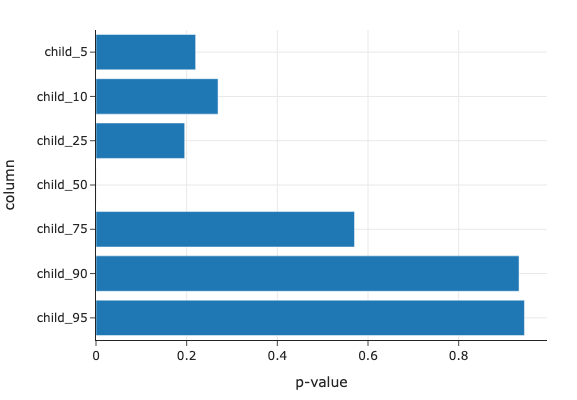

In [152]:
(
    out_q4
    .to_frame()
    .plot(kind='barh', width=800, height=400, labels={'index': 'column', 'value': 'p-value'})
    .update_layout(showlegend=False)
)

Remember, **in all seven columns, the data are truly MAR** – we know this for a fact since we were told in the question:

> The missingness of these <code>'child_X'</code> columns were created as MAR dependent on father's heights (similar to what was done in [Lecture 8](https://dsc80.com/resources/lectures/lec08/lec08.html)). The missingness of these <code>'child_X'</code> columns are all equally dependent on father's heights.

- If our permutation test returned a small $p$-value for a particular column, it means that the distribution of father's heights in rows where the child's height was missing looked significantly different than the distribution of father's heights in rows where the child's height was present. That's evidence that the missingness of that column depends on father's heights.

- If our permutation test returned a large $p$-value for a particular column, that's evidence that the missingness of that column doesn't depend on father's heights.

Despite the fact that the missingness of each `'child_X'` column truly depends on father's heights (by design), it appears that **in all cases except `'child_50'`, we'd conclude that the child's height columns are MCAR** at the 5% significance level! We should be precise – we cannot **prove** that heights are MCAR or MAR, just like we cannot prove either hypothesis in a hypothesis test. Instead, all we can say, for instance, is that two samples don't look like they were drawn from the same population distribution, and hence, the missingness of a particular column **appears** to be dependent on another column.

One thing you'll notice is that when a column contains relatively few missing values, it is exceedingly difficult to conclude that values in that column are missing at random dependent on another column. Think about why this is the case.

## Part 3: Imputation

Now that we're comfortable with missingness mechanisms and how to detect them through data, let's focus on filling in missing values.

### Question 5 – Imputing Heights 🧍📏

In [Lecture 8](https://dsc80.com/resources/lectures/lec08/lec08.html), you learned how to perform single-valued imputation conditionally on a **categorical** column: impute with the mean for each group. That is, for each distinct value of the **categorical** column, there is a single imputed value.

Here, you will perform single-valued imputation by conditioning on a **quantitative** column. 

You will work with a version of the `heights` DataFrame, `new_heights`, that has a `'father'` column and a single `'child'` column. The `'child'` column has missing values. To impute the `'child'` column, transform the `'father'` column into a categorical column by binning the values of `'father'` into [quartiles](https://en.wikipedia.org/wiki/Quartile). Once this is done, you can impute `'child'` as in lecture (and described above).

<br>

#### `cond_single_imputation`

Complete the implementation of the function `cond_single_imputation`, which takes in a DataFrame with columns `'father'` and `'child'` (where `'child'` has missing values) and performs a single-valued mean imputation of the `'child'` column, conditional on `'father'`. Your function should return a **Series**.

***Hints***:
- `pd.qcut` may be helpful (as you likely learned in Project 2)!
- The `transform` method is useful for this question (see [Lecture 3](https://dsc80.com/resources/lectures/lec03/lec03.html#Transformations)), though it's also possible to do this using the `aggregate` method.
- As a reminder, *loops are not allowed*, and functions mentioned in "Hints" are not required.

In [162]:
def cond_single_imputation(new_heights):
    quartiles = pd.qcut(new_heights['father'], q=4)
    mean_child_by_quartile = new_heights.groupby(quartiles)['child'].mean()
    imputed_child = new_heights['child'].fillna(new_heights.groupby(quartiles)['child'].transform('mean'))
    return imputed_child

In [163]:
# don't change this cell, but do run it -- it is needed for the tests to work
heights_fp = Path('data') / 'missing_heights.csv'
new_heights = pd.read_csv(heights_fp)[['father', 'child_50']]
new_heights = new_heights.rename(columns={'child_50': 'child'})
out_q5 = cond_single_imputation(new_heights.copy())

In [164]:
# don't change this cell, but do run it -- it is needed for the tests to work
heights_fp = Path('data') / 'missing_heights.csv'
heights_q5 = pd.read_csv(heights_fp)
heights_q5['child'] = heights_q5['child_50']
inp_q5 = heights_q5
out_q5 = cond_single_imputation(inp_q5)
df_q5 = inp_q5.copy()
df_q5['imputed'] = out_q5
gp1_q5 = df_q5.groupby('father')['imputed'].mean()
gp2_q5 = df_q5.groupby('father')['child'].mean()
m_q5 = (pd.concat([gp1_q5, gp2_q5], axis=1)
     .dropna().diff(axis=1).abs().iloc[:, -1])

In [165]:
grader.check("q5")

q5 results: All test cases passed!

### Question 6 – Probabilistic Imputation 🎲

In [Lecture 8](https://dsc80.com/resources/lectures/lec08/lec08.html), you learned how to impute a quantitative column by sampling from the observed values. **One problem with this technique is that the imputation will never generate imputed values that weren't already in the dataset.** For example, 57, 57.5, and 59 are values in the `'child'` column of `new_heights` while 58 is not. Thus, any imputation done by sampling from the observed values in the `'child'` column will not be able to generate a height of 58, even though it's clearly a reasonable value to occur in the dataset.

To keep things simple, you will impute the `'child'` column **unconditionally** from the distribution of `'child'` heights present in the dataset. This means that you will use the values present in `'child'` to impute missing values, without looking at other columns.

An approach to quantitative imputation that overcomes the limitation mentioned above is as follows:
- Create a histogram of observed `'child'` heights, using 10 bins.
- Use the histogram to generate a number within the observed range of `'child'` heights:
    - The likelihood a generated number belongs to a given bin is equal to the area of that bin. (Remember, in histograms, areas are proportions.)
    - Any number within a fixed bin is equally likely to occur.
    
Let's illustrate this approach with an example. Let `demo` be the array of 10 numbers defined below.

```py
demo = np.array([10, 11, 11, 13, 14, 14, 13.5, 14, 15, 16])
```

- The first step is creating a histogram of `demo`. Note that with this small dataset, we will use 3 bins, but you will be using 10 bins in your imputation process.

<img src='imgs/demo_histogram.png' width=300>

- Note that in your process, you don't actually need to draw a histogram – instead, use `np.histogram`.
- In the histogram above, we see that $2 \cdot 0.15 = 0.3 = 30\%$ of values lie in the [10, 12) bin, $2 \cdot 0.1 = 0.2 = 20\%$ of values lie in the [12, 14) bin, and $2 \cdot 0.25 = 0.5 = 50\%$ of values lie in the [14, 16] bin.
- Next, we need to pick a bin at random. There's a 30\% chance we pick the [10, 12) bin, a 20\% chance we pick the [12, 14) bin, and a 50\% chance we pick the [14, 16] bin. `np.random.choice` will be helpful in picking a bin at random.
- Once we pick a bin, we pick a number **uniformly at random** from within the bin. For instance, suppose we randomly chose the [14, 16] bin in the previous step. We then must select a (real) number between 14 and 16 uniformly at random. `np.random.uniform` can help you here.

<br>

#### `quantitative_distribution`
    
Complete the implementation of the function `quantitative_distribution`, which takes in a Series, `child`, in which some values are missing, and a positive integer `N`, and returns an **array** of `N` imputed values using the method described above. 

***Note***: You may use a `for`-loop.

<br>

#### `impute_height_quant`

Complete the implementation of the function `impute_height_quant`, which takes in a Series, `child`, in which some values are missing and imputes them using the scheme above. `impute_height_quant` should return a Series that is the same length of `child` but with no missing values. **You should use `quantitative_distribution` to help you do this.**

In [221]:
def quantitative_distribution(child, N):
    non_missing_child = child.dropna()
    freq, bin_edges = np.histogram(non_missing_child, density=True)
    choice_distr = []
    for i in range(len(freq)):
        prob = (bin_edges[i+1]-bin_edges[i]) * freq[i]
        choice_distr.append(prob)
    imp_vals = []
    for i in range(N):
        bin_index = np.random.choice(range(10), p=choice_distr)
        imp_val = np.random.uniform(bin_edges[bin_index], bin_edges[bin_index+1])
        imp_vals.append(imp_val)
    imp_vals = np.array(imp_vals)
    return imp_vals

In [224]:
def impute_height_quant(child):
    num_missing = child.isna().sum()
    full_child = child.copy()
    full_child[full_child.isna()] = quantitative_distribution(child, num_missing)
    return full_child

In [225]:
# don't change this cell, but do run it -- it is needed for the tests to work
heights_fp = Path('data') / 'missing_heights.csv'
heights = pd.read_csv(heights_fp)
child = heights['child_50']
quantitative_distribution_out_q6 = quantitative_distribution(child.copy(), 100)
impute_height_quant_out_q6 = impute_height_quant(child.copy())

In [226]:
grader.check("q6")

q6 results: All test cases passed!

### Question 7 – The Rules of Web Scraping 🚔

In Lecture 9, we will start studying web scraping. This question will give you an introduction to the rules behind it.

Many sites have a published policy allowing or disallowing automatic access to their site. Often, this policy is in a text file named `robots.txt`. [Here is a good article](https://moz.com/learn/seo/robotstxt) that explains what these files are, where to find them, and how to use them. **After reading the article**, please answer the following questions.

<br>

#### Multiple-Choice Questions

**1. What is the purpose of `robots.txt`?**

1. To informs agents which pages to crawl.

2. To informs agents that the site is automated.

3. To inform agents that robots will chase them down if their info is stolen.


**2. Where do you put your `robots.txt` file?**

1. In the folder you want to disallow.

2. In the root directory of your website.

3. In a Google search.

**3. Is it illegal to scrape a site if there is no `robots.txt` present?** (***Hint***: [Read this](https://medium.com/@tjwaterman99/web-scraping-is-now-legal-6bf0e5730a78) if you're not sure. If you aren't able to access the article because Medium says "You've read all your free member-only stories...", try opening the article in a new incognito or private browsing window 😅.)

1. Yes.

2. No.

**4. Can each subdomain on a root domain use separate `robots.txt` files?**

1. Yes.

2. No.


<br>


#### Website Hunt

1. Find at least one website that explicitly uses a `robots.txt` file and allows scraping by everyone. One such site is [singleplatform.com](https://places.singleplatform.com) (see [https://places.singleplatform.com/robots.txt](https://places.singleplatform.com/robots.txt)); find another one.

2. Find at least one website that explicitly uses a `robots.txt` file and does not allow scraping by generic user-agents. One such site is [linkedin.com](https://www.linkedin.com) (see [linkedin.com/robots.txt](https://www.linkedin.com/robots.txt)); find another one.


When browsing through `robots.txt` files, you may notice that some have entries for several different user-agents. The user-agent you are interested in for this question is the generic user-agent, which is denoted by `*`. A `/` after a `Disallow:` indicates that no scraping is allowed, whereas nothing after the `Disallow:` or a `/` after `Allow:` indicates that all scraping is allowed.

***Notes***:
- During your search, you may notice that very few websites allow scraping by everyone. When trying to find websites that satisfy this criteria, you are encouraged to think contextually about what kinds of websites would and wouldn't mind you scraping their data. Would a government website likely mind scraping by everyone? How about a website someone created just for fun?

- Some websites may cause Gradescope to time out. Please change a website if you encounter this issue. 

- Below, you are asked to store the URLs of the websites you find in a list. When storing URLs, you can add `'/robots.txt'` to the end, but you don't have to – either format will be accepted.
- **You cannot use singleplatform.com or linkedin.com as your examples!**

<br>


#### `answers`

Complete the implementation of the function `answers`, which takes in no arguments and returns **two lists**:

* one containing your answers to the multiple-choice questions, and
* one containing the URLs of the two sites you found, in any order.

In [229]:
def answers():
    return [1, 2, 2, 1], ['soundcloud.com/robots.txt', 'instagram.com/robots.txt']

In [230]:
# don't change this cell, but do run it -- it is needed for the tests to work
mc_answers, websites = answers()

In [231]:
# don't change this cell, but do run it -- it is needed for the tests to work
from urllib.parse import urlparse
import urllib.robotparser

# This code checks the robots.txt file
def canFetch(url):
    if url[:4] != 'http':
        url = 'https://' + url
    parsed_uri = urlparse(url)

    domain = '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri)

    rp = urllib.robotparser.RobotFileParser()
    rp.set_url(domain + "/robots.txt")
    try:
        rp.read()
        canFetchBool = rp.can_fetch("*", url)
    except:
        canFetchBool = None
    
    return canFetchBool

ans_q7, websites_q7 = answers()
canfetch_q7 = []
for site in websites_q7:
    try:
        canfetch_q7.append(canFetch(site))
    except:
        canfetch_q7.append(None)

In [232]:
grader.check("q7")

q7 results: All test cases passed!

## Congratulations! You're done Lab 5! 🏁

As a reminder, all of the work you want to submit needs to be in `lab.py`.

To ensure that all of the work you want to submit is in `lab.py`, we've included a script named `lab-validation.py` in the lab folder. You shouldn't edit it, but instead, you should call it from the command line (e.g. the Terminal) to test your work.

Once you've finished the lab, you should open the command line and run, in the directory for this lab:

```
python lab-validation.py
```

**This will run all of the `grader.check` cells that you see in this notebook, but only using the code in `lab.py` – that is, it doesn't look at any of the code in this notebook. If all of your `grader.check` cells pass in this notebook but not all of them pass in your command line with the above command, then you likely have code in your notebook that isn't in your `lab.py`!**

You can also use `lab-validation.py` to test individual questions. For instance,

```
python lab-validation.py q1 q2 q4
```

will run the `grader.check` cells for Questions 1, 2, and 4 – again, only using the code in `lab.py`. [This video](https://www.loom.com/share/0ea254b85b2745e59322b5e5a8692e91?sid=5acc92e6-0dfe-4555-9b6a-8115b6a52f99) how to use the script as well.

Once `python lab-validation.py` shows that you're passing all test cases, you're ready to submit your `lab.py` (and only your `lab.py`) to Gradescope. Once submitting to Gradescope, make sure to stick around until all test cases pass.

There is also a call to `grader.check_all()` below in _this_ notebook, but make sure to also follow the steps above.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [233]:
grader.check_all()

q1 results: All test cases passed!

q2 results: All test cases passed!

q3 results: All test cases passed!

q4 results: All test cases passed!

q5 results: All test cases passed!

q6 results: All test cases passed!

q7 results: All test cases passed!